In [3]:
import pandas as pd
import json
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import joblib
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
data = []
with open('hltb.jsonlines') as lines:
        for line in lines:
                data.append(json.loads(line))


In [5]:
#Convert nested dict into list of dicts format
#. I.e. {"Platform": {"Playstation 5": 5 hrs}} into [{"Platform_Playstation": 5}]
#test = df.iloc[0].Stats
def convert(list_dicts):
    total_dict = {}
    for h in list_dicts.keys():
        dict_1 = list_dicts[h].items()
        for i,j in dict_1:
            for k,l in j.items():
                total_dict.update({f'{h}_{i}_{k}': l})
    return  total_dict

#convert(test)

In [6]:
df = pd.DataFrame(data)
df = df.head(20000)
df['Genres'] = df['Genres'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
df.head()

,Name,Stats,steam_app_id,Release_date,Genres,Review_score
0,Borderlands 3,{'Additional Content': {'Moxxi's Heist of the ...,397540,2019-09-13,"First-Person, Action, Shooter",76
1,Dying Light,{'Additional Content': {'The Following': {'Pol...,239140,2015-01-27,"Action, Adventure, Open World, Survival Horror",78
2,Middle-Earth: Shadow of War,{'Additional Content': {'Blade of Galadriel': ...,356190,2017-10-10,"Action, Adventure",76
3,Counter-Strike: Global Offensive,"{'Multi-Player': {'Co-Op': {'Polled': '34', 'A...",730,2012-08-21,"First-Person, Shooter",74
4,Grand Theft Auto IV,{'Additional Content': {'The Lost and Damned':...,5152,2008-04-29,"Third-Person, Action, Sandbox, Shooter",82


In [8]:
total =  df.Stats.apply(lambda x: convert(x)).to_list()

#Let's keep only the primary keys for now as keeping all the keys would result in a very large and sparse dataset
keys_keep=  ['Single-Player_Main Story_Average']

total_keep= []
for g in total:
    temp = {}
    for i in keys_keep:
        for h in g:
            temp.update({i: g.get(i, '')})
    total_keep.append(temp)

In [9]:
def duration_to_minutes(duration_str):
  """Converts a duration string like '3h 18m' to minutes."""
  if isinstance(duration_str, str):
    parts = duration_str.split()
    minutes = 0
    for part in parts:
      if 'h' in part:
        minutes += int(part[:-1]) * 60  # Convert hours to minutes
      elif 'm' in part:
        minutes += int(part[:-1])  # Add minutes
    return minutes
  else:
    # Handle cases where duration is not a string (e.g., NaN)
    return 0  # or any other appropriate default value

In [10]:
df_format = pd.concat([df.drop(columns= ['Stats', 'steam_app_id']), pd.DataFrame(total_keep)], axis = 1)
df_final = df_format[['Name' , 'Genres', 'Single-Player_Main Story_Average','Review_score']]
df_final = df_final.dropna()
#df_final['Genres'] = df_final['Genres'].apply(lambda x: x.split(',')[0])
label_encoder = LabelEncoder()
df_final['genre_encoded'] = label_encoder.fit_transform(df_final['Genres'])
df_final.info()
df_final.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 17063 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              17063 non-null  object
 1   Genres                            17063 non-null  object
 2   Single-Player_Main Story_Average  17063 non-null  object
 3   Review_score                      17063 non-null  int64 
 4   genre_encoded                     17063 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 799.8+ KB


,Name,Genres,Single-Player_Main Story_Average,Review_score,genre_encoded
0,Borderlands 3,"First-Person, Action, Shooter",23h 17m,76,456
1,Dying Light,"Action, Adventure, Open World, Survival Horror",18h 10m,78,38
2,Middle-Earth: Shadow of War,"Action, Adventure",20h 47m,76,17
3,Counter-Strike: Global Offensive,"First-Person, Shooter",,74,598
4,Grand Theft Auto IV,"Third-Person, Action, Sandbox, Shooter",27h 37m,82,1576
5,Cuphead,"Side, Action",10h 46m,87,1217
6,Marvel's Spider-Man: Game of the Year Edition,"Third-Person, Action, Adventure, Open World, S...",17h 27m,88,1524
7,Borderlands: The Pre-Sequel!,"First-Person, Action, Role-Playing, Shooter",18h 13m,70,452
8,Assassin's Creed Odyssey,"Third-Person, Action, Open World, Role-Playing",45h 10m,80,1562
9,Half-Life 2: Episode One,"First-Person, Shooter",3h 45m,81,598


In [11]:
#split dataset in features and target variable
#feature_cols = ['genre_encoded', 'Single-Player_Main Story_Average']
feature_cols = ['genre_encoded', 'Single-Player_Main Story_Average', 'Review_score']
X = df_final[feature_cols]
X['Single-Player_Main Story_Average'] = X['Single-Player_Main Story_Average'].apply(duration_to_minutes)
y = df_final["Name"]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_96888\855703856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Single-Player_Main Story_Average'] = X['Single-Player_Main Story_Average'].apply(duration_to_minutes)


In [39]:
import numpy as np

# Convertir y en un arreglo numpy si es necesario
y = np.array(y)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_test)
# Supongamos que `y_train` contiene los nombres de los juegos
game_names = y.tolist()  # Convierte los nombres en una lista (si aún no lo está)
game_duration = X['Single-Player_Main Story_Average']
# Añadir `game_names` como un atributo personalizado del modelo
knn.game_names = game_names
knn.game_duration = game_duration

# Obtener los 5 vecinos más cercanos para cada muestra en X_test sin cambiar el modelo original
distances, indices = knn.kneighbors(X_test, n_neighbors=5)

# Obtener las etiquetas de los 5 vecinos más cercanos
neighbor_labels = y[indices]

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,5)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=3,scoring='accuracy')
    cv_scores.append(scores.mean()) 

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(optimal_k)

c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


1


In [16]:
neighbor_labels


array([['Deathsmiles', 'B.ARK', 'Touhou Chireiden: Subterranean Animism',
        'Gradius IV', 'DoDonPachi Dai-Ou-Jou'],
       ['Cute Bite', 'Conspiracy!',
        'The Stone Cutter and the Mountain Spirit',
        'Wolves in the Walls', 'Adventurezator: When Pigs Fly'],
       ['Mystery Chronicle: One Way Heroics', 'Survival Kids',
        'The Boogie Man', 'Coin Crypt', 'Princess Maker 2 Refine'],
       ...,
       ['WOLFLAME', 'Albert and Otto: The Adventure Begins',
        'Star Saviors', 'Alien Shooter 2: Conscription',
        "Demon's Crystals"],
       ["Alwa's Awakening", 'MO: Astray', 'GoNNER',
        'Metal Slug Anthology', "Oddworld: New 'n' Tasty!"],
       ['Primordia', 'Paradigm', 'One Dreamer', 'Martha is Dead',
        'Leisure Suit Larry: Love for Sail!']], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Evaluar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Evaluo la precision del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precisión del modelo: {precision:.2f}")

# Evaluo el recall del modelo
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall del modelo: {recall:.2f}")

# Evaluo el f1 score del modelo
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score del modelo: {f1:.2f}")

Accuracy del modelo: 0.96
Precisión del modelo: 0.95
Recall del modelo: 0.96
F1 Score del modelo: 0.95


c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
input_genero ='First-Person, Shooter'  # Nuevo género
input_minutos = 1000  # Nuevas minutos estimadass
input_review_score = 100  # Puntuación de reseña más cercana a
# Verificar si el nuevo género está en las etiquetas del encoder
if input_genero in label_encoder.classes_:
    input_genero_encoded = label_encoder.transform([input_genero])[0]

    # Predecir el nombre del juego más cercano basado en género y horas
    #prediction = knn.predict([[input_genero_encoded, input_minutos,input_review_score]])
    #print(f"Juego recomendado: {prediction[0]}")
        # Usar kneighbors para obtener los 5 juegos más cercanos
    distances, indices = knn.kneighbors([[input_genero_encoded, input_minutos,input_review_score]], n_neighbors=5)

    # Obtener las etiquetas de los juegos recomendados
    recommended_games = [knn.game_names[i] for i in indices[0]]  # y contiene los nombres de los juegos
    # Imprimir las 5 recomendaciones
    print("Juegos recomendados:")
    for i, game in enumerate(recommended_games, start=1):
        print(f"Opción {i}: {game} (Distancia: {distances[0][i-1]})")
        print(knn.game_duration[i])
    
else:
    print(f"El género '{new_genre}' no está presente en los datos originales.")


Juegos recomendados:
Opción 1: GTFO (Distancia: 24.351591323771842)
1090
Opción 2: Blade of Agony (Distancia: 30.14962686336267)
1247
Opción 3: King's Field (Distancia: 31.064449134018133)
0
Opción 4: Thief: Deadly Shadows (Distancia: 47.05316142407437)
1657
Opción 5: Love, Money, Rock'n'Roll (Distancia: 49.4368283772331)
646


c:\Users\USUARIO\FACULTAD\TPO CIENCIA DE DATOS\TPOCD\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


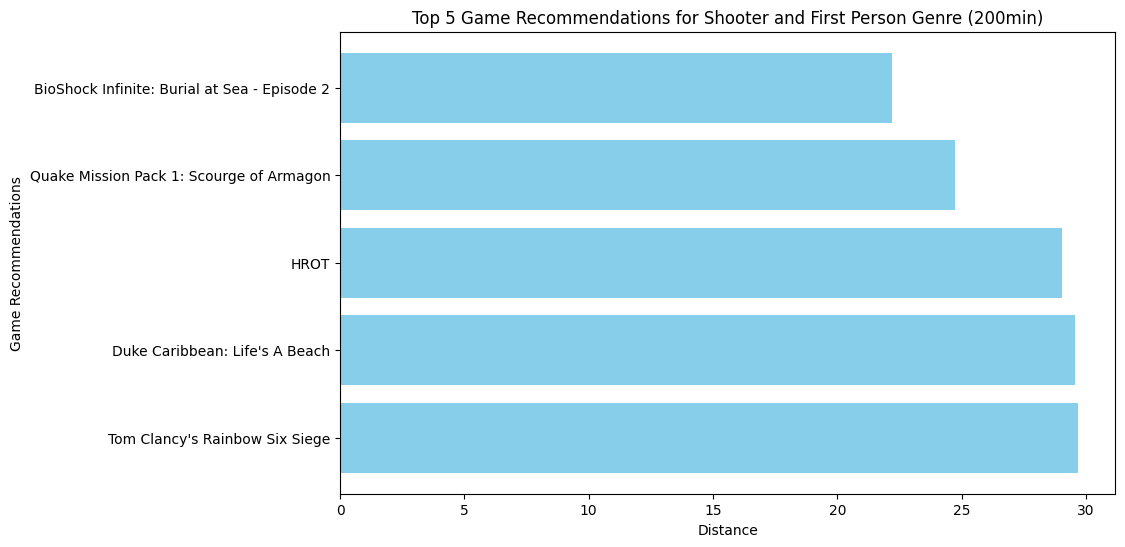

In [33]:
import matplotlib.pyplot as plt

# Crear una gráfica de barras para las recomendaciones
plt.figure(figsize=(10, 6))
plt.barh(recommended_games, distances[0], color='skyblue')
plt.xlabel("Distance")
plt.ylabel("Game Recommendations")
plt.title("Top 5 Game Recommendations for Shooter and First Person Genre (200min)")
plt.gca().invert_yaxis()  # Invierte el eje y para que el más cercano esté arriba
plt.show()

In [87]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [88]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']